In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy
import plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot, init_notebook_mode

In [2]:
def mainroot(a,b,c,d):
    Tmax = -1 * np.sqrt((b-d)**2 +(a-c)**2)
    return Tmax

In [3]:
def newPQ(a,b,c,d,p,q):
    m=(d-b)/(c-a)
    x1=((p/m)+q+(m*a)-b)/(m +(1/m))
    y1= m*(x1-a)+b
    newQ= - np.sqrt((b-y1)**2 +(a-x1)**2)
    newP= np.sqrt((p-x1)**2 +(q-y1)**2)
    if p < x1:
        newP=-newP
    return (newP, newQ)

In [4]:
def findBest(Tmax,G,p,q,a):
    t=0
    bestLength= 1000000000000.0
    bestT = t
    while t >= Tmax:
        b = (q - G * (p**2) - t)/p
        if p>0:
            x =np.linspace(0, p, num=50)
        elif p < 0:
            x =np.linspace(p, 0, num=50)
        lot = np.sqrt(1+(2*G*x + ((q-G*(p**2)-t)/p))**2)
        y= a*(lot) +(1-a)*(lot - t)
        length = scipy.integrate.trapezoid(y,x)
        if length < bestLength:
            #ploting(Tmax,p,q,bestT,G) #comparing possible lines
            bestLength = length
            bestT = t
        t = t - 0.01 #last 
    #ploting(Tmax,p,q,bestT,G)
    #print("length: " + str(bestLength) +" t= " + str(bestT))
    return(bestLength,bestT)

In [5]:
def bestTAngled(a,b,c,d,p,q,G,al):
    Tmax = mainroot(a,b,c,d)
    pqArray= newPQ(a,b,c,d,p,q)
    bestArray= findBest(Tmax,G,pqArray[0],pqArray[1],al)
    length = bestArray[0]
    t= bestArray[1]
    m= (d-b)/(c-a)
    qa= m**2 +1
    qb= -2*a -2*a*(m**2)
    qc= a**2 +(a**2)*(m**2) - (t**2)
    xt= (-qb + np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    if (xt <a and xt <c) or (xt>a and xt>c):
        xt= (-qb - np.sqrt(qb**2 -(4*qa*qc)))/(2*qa)
    yt = m*(xt-a)+b
    dArray =[t, pqArray[0], pqArray[1]]
    return(length, xt,yt,dArray)

In [6]:
def angledMPlot(a,b,c,d):
    if a >c:
        x=np.linspace(c,a, num =50)
    else:
        x= np.linspace(a,c, num =50)
    m= (b-d)/(a-c)
    y = m*(x-a)+b
    main =go.Scatter(x=x,y=y,mode='lines', name= "main root")
    return (main)

In [7]:
def deAngledMPlot(a,b,c,d):
    Tmax = mainroot(a,b,c,d)
    y = np.linspace(Tmax, 0)
    x= 0*y
    main = go.Scatter(x=x,y=y, mode='lines', name = "mainroot")
    return main

In [11]:
def plotA(a,b,c,d,p,q,G,al,length, xt, yt,t):
    if xt >p:
        x =np.linspace(p, xt, num=50)
    else:
        x = np.linspace(xt, p ,num=50)
    by=(q - G*(p**2) +b)/p
    y=G * x**2 + by*x - b
    trace =go.Scatter(x=x,y=y,mode='lines', name= str(length))
    return trace

In [12]:
def plotD(G,al, Tmax, length,t, p,q):
    x1=np.linspace(0,p)
    b=(q - G*(p**2) -t)/p
    y1=G * x1**2 + b*x1 + t
    trace2 =go.Scatter(x=x1,y=y1,mode='lines', name= str(length))
    return trace2

enter a:  2
enter b:  4
enter c:  10
enter d:  -10
enter G:  .9
enter alpha value:  .9
enter the number of points you would like to do:  2
enter p value for point: 1 5
endter q value for point: 1 -5
enter p value for point: 2 -3
endter q value for point: 2 -7


[['lenght', 'xt', 'yt', 't'], [4.197963178684933, 6.276717648635838, -3.4842558851127166, -8.61999999999986], [45.37934588774504, 2.0, 4.0, 0]]


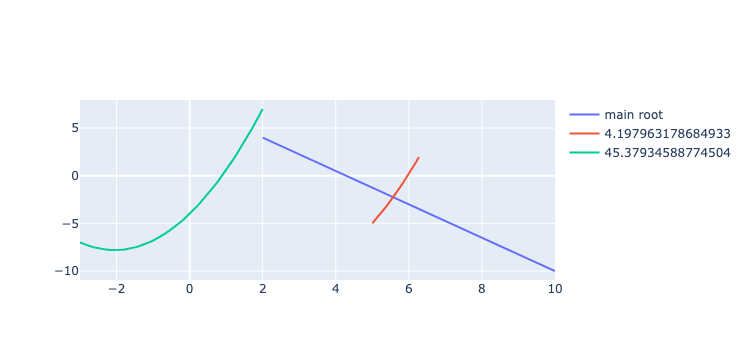

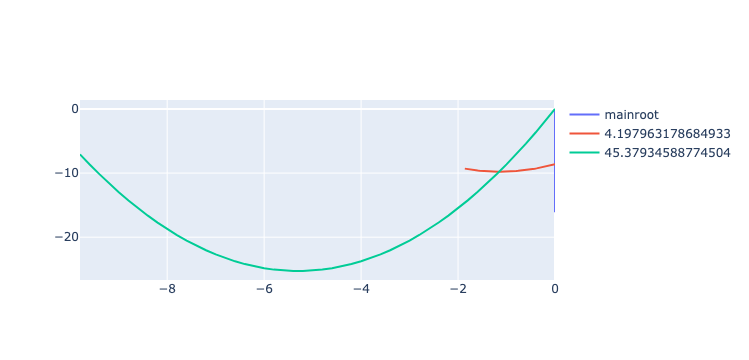

In [13]:
a = float(input("enter a: "))
b = float(input("enter b: ") )
c = float(input("enter c: "))
d = float(input("enter d: "))
AngledPlot = []
deAngledPlot=[]
Tmax = mainroot(a,b,c,d)
AngledPlot.append(angledMPlot(a,b,c,d))
deAngledPlot.append(deAngledMPlot(a,b,c,d))
G = float(input("enter G: "))
al = float(input("enter alpha value: "))
numPoints = int(input("enter the number of points you would like to do: "))
point=1
listOfTs=[["lenght","xt","yt","t"]]
while point < (numPoints+1):
    p = float(input("enter p value for point: " +str(point)))
    q = float(input("endter q value for point: " + str(point)))
    Array = bestTAngled(a,b,c,d,p,q,G,al)
    dArray= Array[3]
    AngledPlot.append(plotA(a,b,c,d,p,q,G,al,Array[0], Array[1], Array[2],dArray[0]))
    printArray=[Array[0], Array[1],Array[2],dArray[0]]
    listOfTs.append(printArray)
    deAngledPlot.append(plotD(G,al,Tmax, Array[0], dArray[0],dArray[1],dArray[2]))
    point = point+1
print (listOfTs)
iplot(AngledPlot)
iplot(deAngledPlot)